In [1]:
import os
os.getcwd( )

os.chdir('C:\\data')

# Modelling



## Imports Necessários

In [10]:
import datetime
import numpy as np
import pandas as pd
import random
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
## for explainer
from lime import lime_tabular
    
## plot style and warnings    
plt.style.use('ggplot')
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')

### Abertura da Base de Dados

In [5]:
df = pd.read_csv('df_final.csv', sep=',')

In [6]:
df.columns

Index(['Ranking_Diff', 'Sets', 'Age_Difference', 'Seasons_Encoded',
       'GameRoundFases_Encoded', 'Encoded_Age_Difference_Interval',
       'Encoded_Ranking_Difference_Interval',
       'Encoded_Height_Difference_Interval', 'Present_Prize', 'Tiebreak',
       'Tournament_Encoded'],
      dtype='object')

### Informações sobre esta Base de Dados

Nesta base de dados existem 11 colunas.

Idealmente teremos 10 variáveis preditoras e 1 target ('Score_Sets').

Destas 11 colunas, podemos considerar que existem:

- 8 colunas categóricas (Sets, Seasons_Encoded, GameRoundFases_Encoded, Encoded_Age_Difference_Interval, Encoded_Ranking_Difference_Interval, Encoded_Height_Difference_Interval, Tiebreak, Tournament_Encoded);

- 3 colunas numéricas (Ranking_Diff, Age_Difference, Present_Prize).

### Correlações

Em baixo vamos calcular correlações entre as nossas variáveis.

#### Correlações entre variáveis categóricas

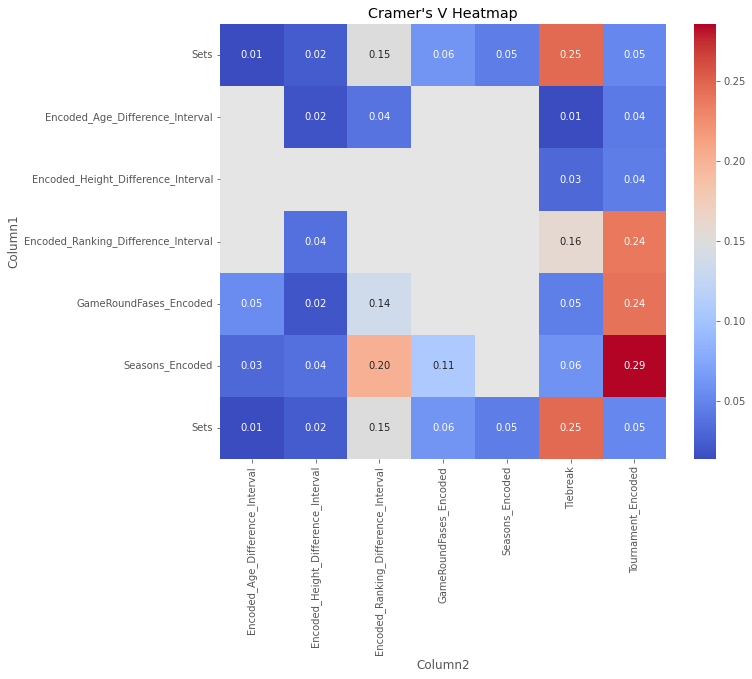

In [13]:
# Create a subset DataFrame with the columns you want to analyze
subset_df = df[["Sets", "Seasons_Encoded", "GameRoundFases_Encoded", "Encoded_Age_Difference_Interval",
               "Encoded_Ranking_Difference_Interval", "Encoded_Height_Difference_Interval",
               "Tiebreak", "Tournament_Encoded"]]

# Calculate the Cramer's V values for each column pair
cramer_v_values = []
for i in range(len(subset_df.columns)):
    for j in range(i+1, len(subset_df.columns)):
        contingency_table = pd.crosstab(subset_df.iloc[:, i], subset_df.iloc[:, j])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        phi = np.sqrt(chi2 / n)
        r, k = contingency_table.shape
        cramers_v = phi / np.sqrt(min(r - 1, k - 1))
        cramer_v_values.append((subset_df.columns[i], subset_df.columns[j], cramers_v))

# Create a DataFrame with the Cramer's V values
cramer_v_df = pd.DataFrame(cramer_v_values, columns=["Column1", "Column2", "Cramer's V"])

# Create a pivot table for the heatmap
heatmap_data = cramer_v_df.pivot("Column1", "Column2", "Cramer's V")

# Move "Sets" to the first row of the heatmap
heatmap_data = heatmap_data.reindex(["Sets"] + list(heatmap_data.index[:-1]))

# Plot the Cramer's V heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cramer's V Heatmap")
plt.show()


#### Correlações entre Variáveis Numéricas

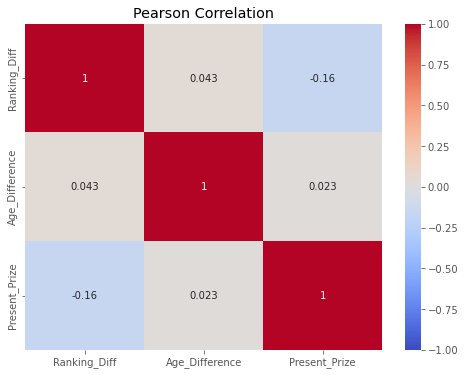

In [14]:
subset_df = df[["Ranking_Diff", "Age_Difference", "Present_Prize"]]

# Calculate the Pearson correlation coefficients
correlation_matrix = subset_df.corr(method='pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation")
plt.show()

#### Correlações entre a variável Target (categórica) e as restantes variáveis Numéricas

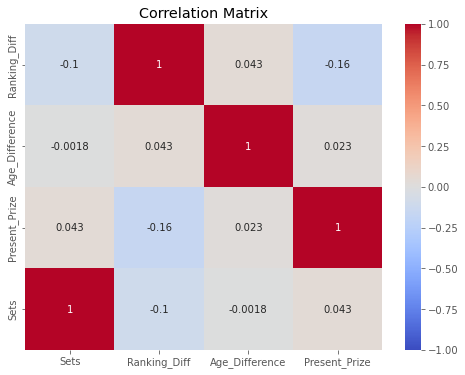

In [15]:
subset_df = df[["Sets", "Ranking_Diff", "Age_Difference", "Present_Prize"]]

# Calculate the correlations
correlation_matrix = subset_df.corr()

# Move "Sets" to the first row of the correlation matrix
sets_corr = correlation_matrix["Sets"].copy()
correlation_matrix = correlation_matrix.drop("Sets", axis=0)
correlation_matrix = correlation_matrix.append(sets_corr)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()